In [3]:
###data load
install.packages("WDI")
library(WDI)
gdp<-WDI(country = c("US", "CA", "GB", "CN", "JP", "SG", "IL", "KR"),
         indicator=c("NY.GDP.PCAP.CD", "NY.GDP.MKTP.CD"),
         start=1960, end=2016
)

names(gdp)<-c("iso2c", "Country", "Year", "PerCapGDP", "GDP")

Installing package into ‘/home/junhwan/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [6]:
##data reshape
# install.packages("reshape2")
library(reshape2)
gdpCast<-dcast(Year~Country,
               data=gdp[ , c("Country","Year", "PerCapGDP" )],
               value.var="PerCapGDP")

# gdpCast

Installing package into ‘/home/junhwan/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


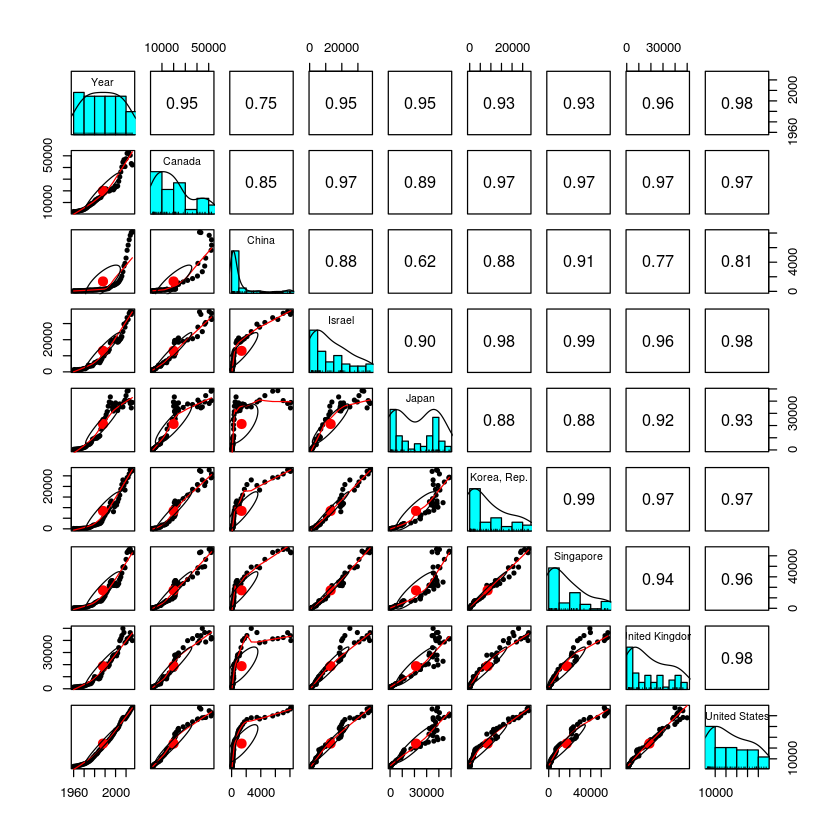

In [7]:
## check correlation
install.packages("psych")
library(psych)
pairs.panels(gdpCast)

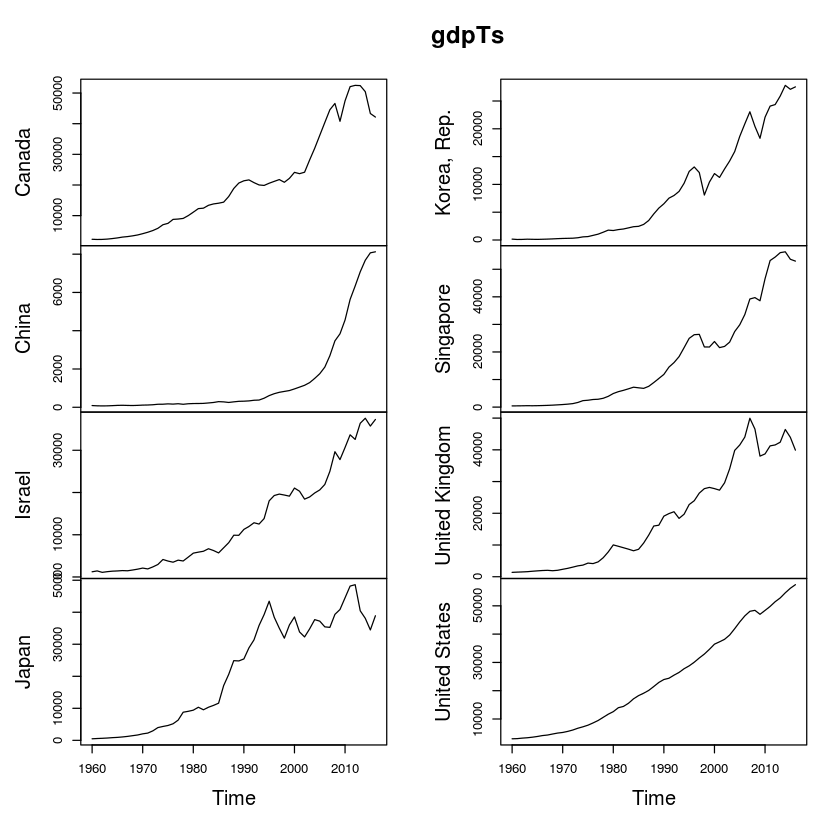

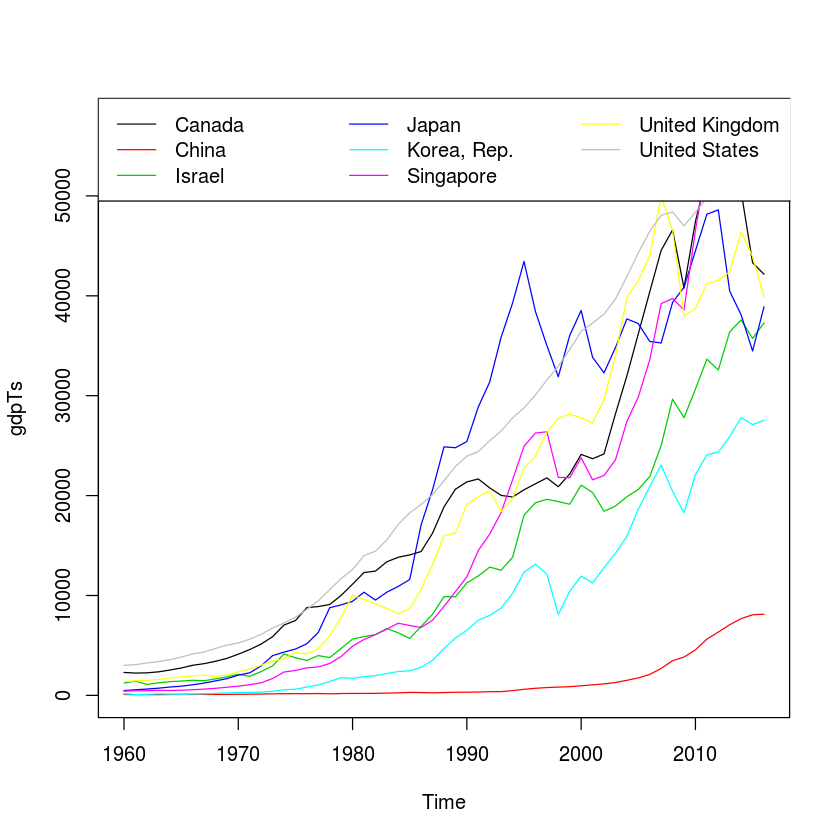

In [9]:
##convert into time series
gdpTs<-ts(data=gdpCast[,-1]
          ,start=min(gdpCast$Year , end = max(start=min(gdpCast$Year))))

## check data
plot(gdpTs)
plot(gdpTs, plot.type="single", col=1:9)

legend("topleft", legend=colnames(gdpTs), lty=1, col=1:9, ncol=3)

Installing package into ‘/home/junhwan/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
also installing the dependencies ‘TTR’, ‘quadprog’, ‘quantmod’, ‘tseries’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘RcppArmadillo’



[1] 1

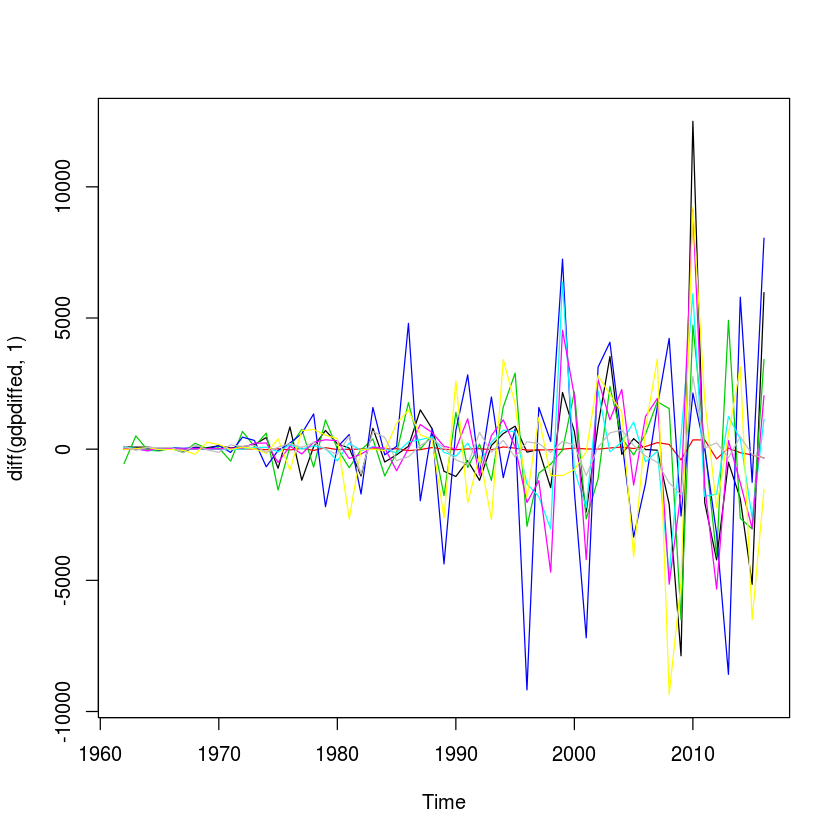

In [11]:
## check best diff
install.packages("forecast")
library(forecast)

numDiffs<-ndiffs(gdpTs)
numDiffs
gdpdiffed<-(diff(gdpTs, 1))

plot(diff(gdpdiffed, 1), plot.type="single", col=1:9)

In [12]:
##load and create VAR model
install.packages("vars")
library(vars)
gdpvar<-VAR(gdpdiffed)

Installing package into ‘/home/junhwan/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
also installing the dependencies ‘strucchange’, ‘urca’, ‘sandwich’

Loading required package: MASS
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: urca
Loading required package: lmtest


In [14]:
## Var object
names(gdpvar)
names(gdpvar$varresult)
names(gdpvar$varresult$Korea..Rep.)
class(gdpvar$varresult$Korea..Rep.)

[1] "varresult"    "datamat"      "y"            "type"         "p"           
 [6] "K"            "obs"          "totobs"       "restrictions" "call"

[1] "Canada"         "China"          "Israel"         "Japan"         
[5] "Korea..Rep."    "Singapore"      "United.Kingdom" "United.States"

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

[1] "lm"

$Canada
           fcst     lower    upper       CI
[1,] -1429.1540 -4982.004 2123.696 3552.850
[2,]   946.1759 -3264.360 5156.712 4210.536
[3,]   594.8704 -3771.074 4960.815 4365.945
[4,]   380.5554 -4074.238 4835.349 4454.793
[5,]   529.4867 -3962.129 5021.103 4491.616

$China
          fcst     lower    upper       CI
[1,] -45.39394 -249.7784 158.9906 204.3845
[2,]  34.52345 -277.8040 346.8509 312.3275
[3,]  64.83698 -320.3226 449.9965 385.1596
[4,]  57.94822 -372.7479 488.6444 430.6961
[5,]  54.12335 -408.2497 516.4964 462.3731

$Israel
           fcst     lower    upper       CI
[1,]  -13.39499 -2420.712 2393.922 2407.317
[2,] 1383.81472 -1383.319 4150.949 2767.134
[3,]  957.57223 -1867.009 3782.153 2824.581
[4,]  587.35058 -2260.003 3434.704 2847.353
[5,]  495.92674 -2358.567 3350.421 2854.494

$Japan
         fcst     lower    upper       CI
[1,] 579.8032 -4499.577 5659.183 5079.380
[2,] 762.7656 -4710.074 6235.605 5472.839
[3,] 641.0166 -4900.229 6182.262 5541.246
[4,] 909.6320

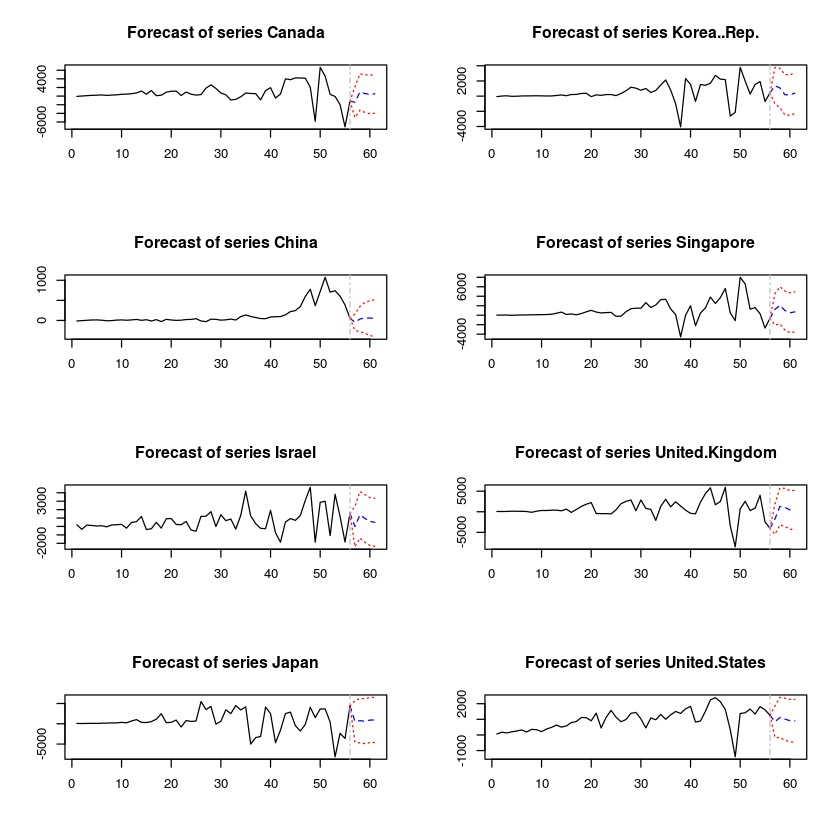

In [15]:
## predict
predict(gdpvar, n.ahead=5) 
plot(predict(gdpvar, n.ahead=5) )

Installing package into ‘/home/junhwan/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
also installing the dependency ‘RJSONIO’

Loading required package: RJSONIO
Installing package into ‘/home/junhwan/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


ERROR: Error in View(gdpCast): ‘View()’ not yet supported in the Jupyter R kernel
